In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the Data
data = pd.read_csv("Mall_Customers.csv")
print(data.head())
# Only keeping 2 features for visualization: Annual Income and Spending Score
X = data.iloc[:,[3,4]].values

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Using Elbow Method to find the optimal number of clusters to use

In [4]:
from sklearn.cluster import KMeans

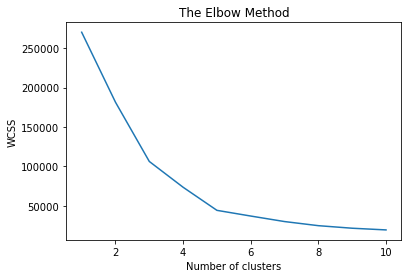

In [5]:
# Taking k value from 1-10 
# Note: k-means++ to avoid random initialization problem
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=61)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [6]:
# We can see that after k=5 the graph isn't decreasing that much hence we take k=5

In [8]:
# Training the K-means Model on dataset
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=61)
kmeans.fit(X)
# Now creating class for each cluster
y_kmeans = kmeans.predict(X)

In [10]:
# Note that the values printed represents the cluster in which a customer belongs
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


In [11]:
# Plotting the clusters

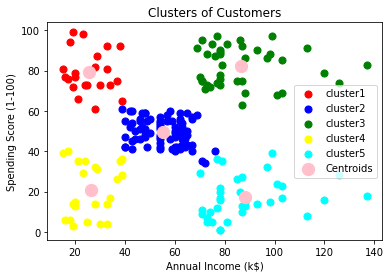

In [23]:
plt.scatter(X[y_kmeans==0, 0],X[y_kmeans==0, 1], s=50, c='red', label='cluster1')
plt.scatter(X[y_kmeans==1, 0],X[y_kmeans==1, 1], s=50, c='blue', label='cluster2')
plt.scatter(X[y_kmeans==2, 0],X[y_kmeans==2, 1], s=50, c='green', label='cluster3')
plt.scatter(X[y_kmeans==3, 0],X[y_kmeans==3, 1], s=50, c='yellow', label='cluster4')
plt.scatter(X[y_kmeans==4, 0],X[y_kmeans==4, 1], s=50, c='cyan', label='cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='pink', label='Centroids')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()